# <center>${\textbf{Deep Learning}}$</center><br><center>${\textbf{ Artificial Neural Network :  ANN}}$</center><br><center>${\textbf{Customer Churn}}$</center>


${\textbf{Introduction }}$ This is a Python-based artificial neural network that predicts whether a customer will leave a bank based on multiple independent variables (some of which are credit score, age and gender). The neural network is trained on a set of data before being tested on new data.

${\textbf{Importing Libraries}}$

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import pandas_profiling as pp

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [5]:
from sklearn.compose import ColumnTransformer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [8]:
from sklearn.pipeline import make_pipeline

In [9]:
from sklearn.model_selection import KFold, cross_val_score

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier

In [11]:
from sklearn.metrics import confusion_matrix

${\textbf{Loading Churn Modelling Dataset}}$

In [12]:
Churn =  pd.read_csv('Churn_Modelling.csv')

<center>${\textbf{Data OverView}}$<center> 


* Data Set Characteristics: Multivariate
* Number of Instances: 10000
* Area: N/A
* Attribute Characteristics: Categorical, Integer, Real
* Number of Attributes: 14
* Date Donated: ?
* Associated Tasks: Classification
* Missing Values: ?
* Number of Web Hits: 1981789

${\textbf{Data Set Information: }}$

Predicting which customers will leave the organization by looking at some of the important attributes and applying Machine Learning and Deep Learning to it.

When a customer (player, subscriber, user, etc.) discontinues his or her relationship with a company, this is referred to as customer churn. Once a certain amount of time has passed since the customer's last interaction with the site or service, the customer is typically considered churned.

A Predictive Churn Model is a tool that defines the steps and stages of customer churn, or the process by which a customer leaves your service or product. However, with an evolving churn model, you can fight for retention by reacting to metrics as they occur.

Customer churn, also known as customer attrition, occurs when customers or subscribers discontinue doing business with a company or service. It is also known as client or customer loss.... We will predict customer churn using telecom datasets, which is similar to predicting employee turnover.

${\textbf{Attribute Information: }}$
1. RowNumber: Row Numbers from 1 to 10000
2. CustomerId: Unique Ids for bank customer identification
3. Surname: Customer's last name
4. CreditScore: Credit score of the customer
5. Geography: The country from which the customer belongs
6. Gender: Male or Female
7. Age: Age of the customer
8. Tenure: Number of years for which the customer has been with the bank
9. Balance: Bank balance of the customer
10. NumOfProducts: Number of bank products the customer is utilising
11. HasCrCard: Binary Flag for whether the customer holds a credit card with the bank or not
12. IsActiveMember: Binary Flag for whether the customer is an active member with the bank or not
13. EstimatedSalary: Estimated salary of the customer in Dollars
14. Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained

${\textbf{Preliminary Insights}}$

In [13]:
print(Churn.shape)
Churn.info()

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [14]:
Churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [15]:
Churn.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [16]:
pp.ProfileReport(Churn)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
Churn.describe().T.round(2)

count         mean       std          min          25%  \
RowNumber        10000.0      5000.50   2886.90         1.00      2500.75   
CustomerId       10000.0  15690940.57  71936.19  15565701.00  15628528.25   
CreditScore      10000.0       650.53     96.65       350.00       584.00   
Age              10000.0        38.92     10.49        18.00        32.00   
Tenure           10000.0         5.01      2.89         0.00         3.00   
Balance          10000.0     76485.89  62397.41         0.00         0.00   
NumOfProducts    10000.0         1.53      0.58         1.00         1.00   
HasCrCard        10000.0         0.71      0.46         0.00         0.00   
IsActiveMember   10000.0         0.52      0.50         0.00         0.00   
EstimatedSalary  10000.0    100090.24  57510.49        11.58     51002.11   
Exited           10000.0         0.20      0.40         0.00         0.00   

                         50%          75%          max  
RowNumber            5000.50      7500.25     10000.00  
CustomerId       15690738.00  15753233.75  15815690.00  
CreditScore           652.00       718.00       850.00  
Age                    37.00        44.00        92.00  
Tenure                  5.00         7.00        10.00  
Balance             97198.54    127644.24    250898.09  
NumOfProducts           1.00         2.00         4.00  
HasCrCard               1.00         1.00         1.00  
IsActiveMember          1.00         1.00         1.00  
EstimatedSalary    100193.92    149388.25    199992.48  
Exited                  0.00         0.00         1.00

<center>${\textbf{Exploratory Data Analysis: EDA}}$<center>

In [18]:
Churn['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

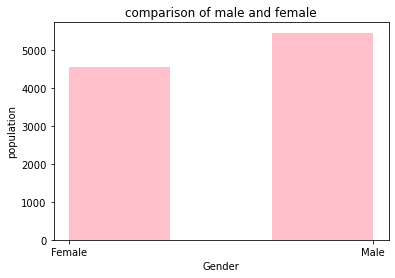

In [19]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = Churn.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

In [20]:
Churn['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

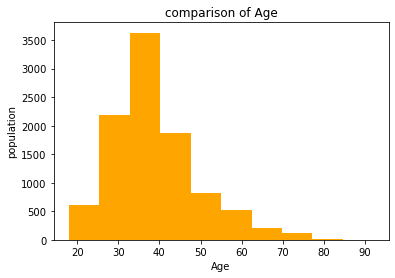

In [21]:
# comparison of age in the dataset

plt.hist(x = Churn.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [22]:
Churn['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

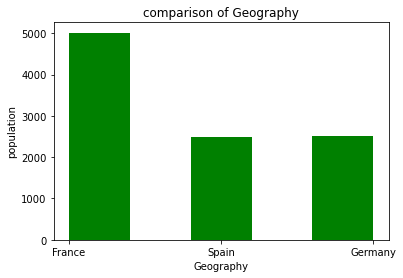

In [23]:
# comparison of geography

plt.hist(x = Churn.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [24]:
Churn['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

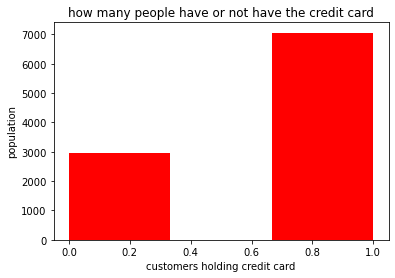

In [25]:
# comparision of how many customers hold the credit card

plt.hist(x = Churn.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [26]:
Churn['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

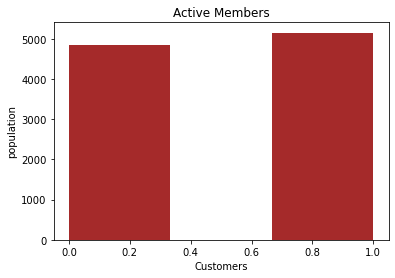

In [27]:
# How many active member does the bank have ?

plt.hist(x = Churn.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

<AxesSubplot:xlabel='Gender'>

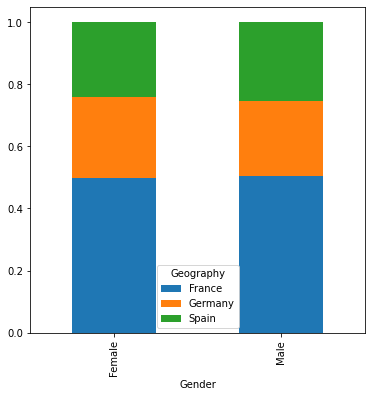

In [28]:
# comparison between Geography and Gender

Gender = pd.crosstab(Churn['Gender'],Churn['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

<AxesSubplot:xlabel='HasCrCard'>

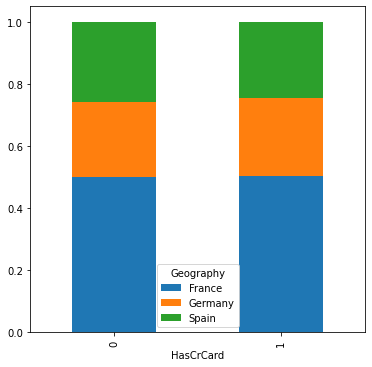

In [29]:
# comparison between geography and card holders
HasCrCard = pd.crosstab(Churn['HasCrCard'], Churn['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))

<AxesSubplot:xlabel='IsActiveMember'>

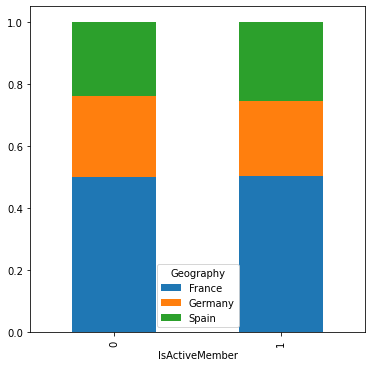

In [30]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(Churn['IsActiveMember'], Churn['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))

In [31]:
# calculating total balance in france, germany and spain

total_france = Churn.Balance[Churn.Geography == 'France'].sum()
total_germany = Churn.Balance[Churn.Geography == 'Germany'].sum()
total_spain = Churn.Balance[Churn.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


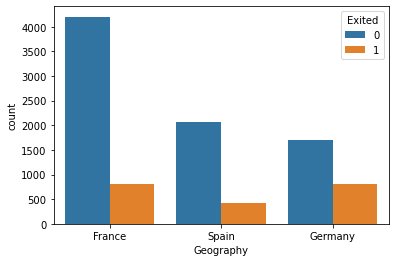

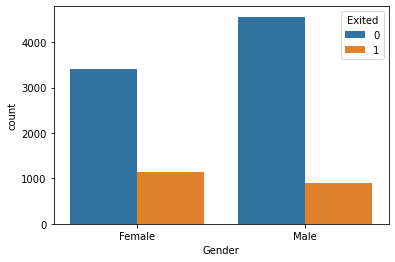

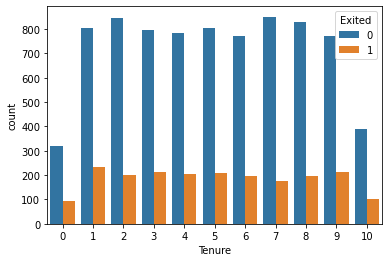

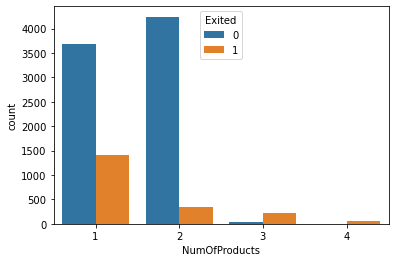

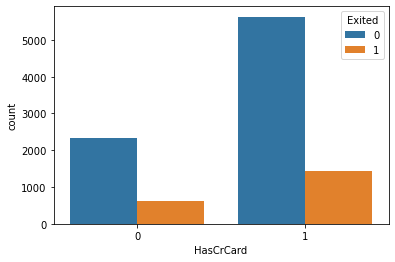

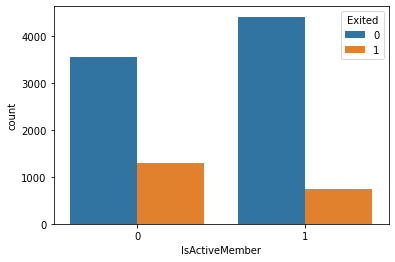

In [32]:
cat_cols = ["Geography", "Gender", "Tenure","NumOfProducts", "HasCrCard", "IsActiveMember"]
for col in cat_cols:
    sns.countplot(Churn[col], hue = Churn.Exited)
    plt.show()

index  Exited
0      0  0.7963
1      1  0.2037

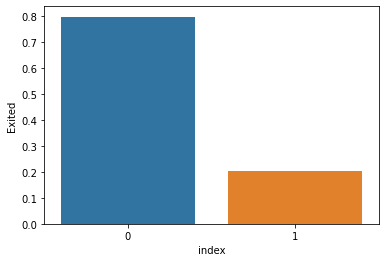

In [33]:
density = Churn['Exited'].value_counts(normalize=True).reset_index()
sns.barplot(data=density, x='index', y='Exited', );
density

In [34]:
def box_scatter(data, x, y):    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
    sns.boxplot(data=data, x=x, ax=ax1)
    sns.scatterplot(data=data, x=x,y=y,ax=ax2)

# of Bivariate Outliers: 19


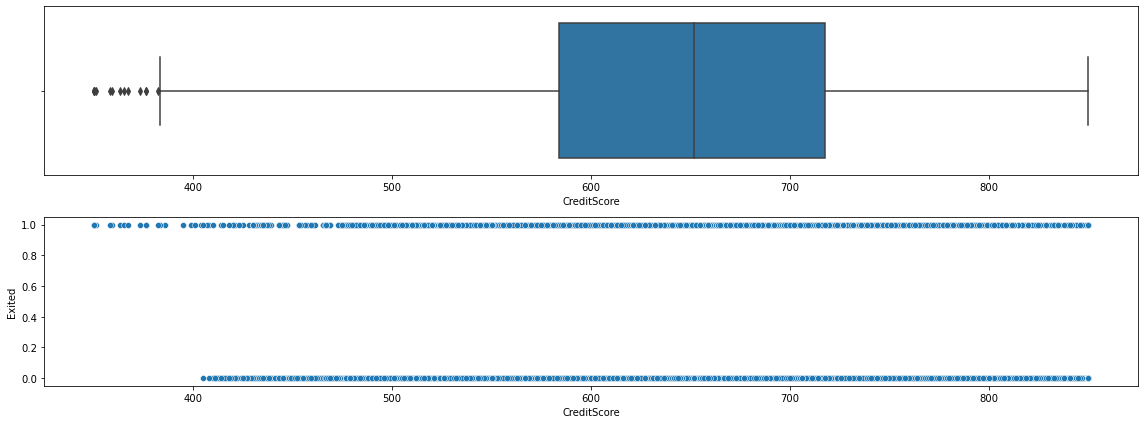

In [35]:
box_scatter(Churn,'CreditScore','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(Churn.loc[Churn['CreditScore'] < 400])}")

# of Bivariate Outliers: 3


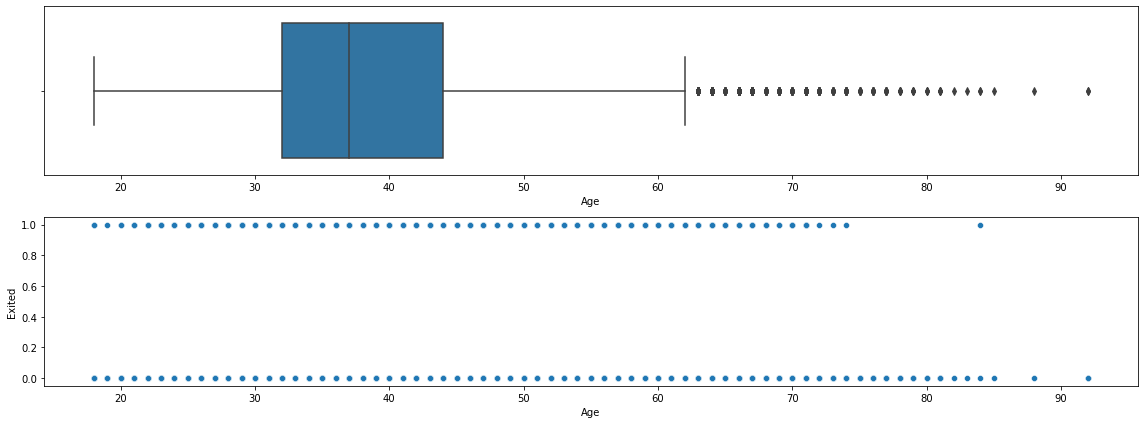

In [36]:
box_scatter(Churn,'Age','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(Churn.loc[Churn['Age'] > 87])}")

# of Bivariate Outliers: 4


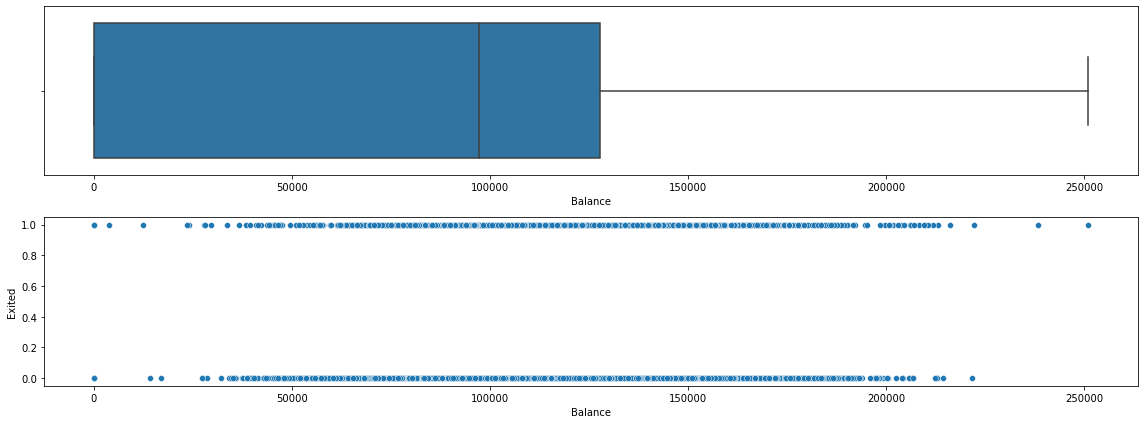

In [37]:
box_scatter(Churn,'Balance','Exited');
plt.tight_layout()
print(f"# of Bivariate Outliers: {len(Churn.loc[Churn['Balance'] > 220000])}")

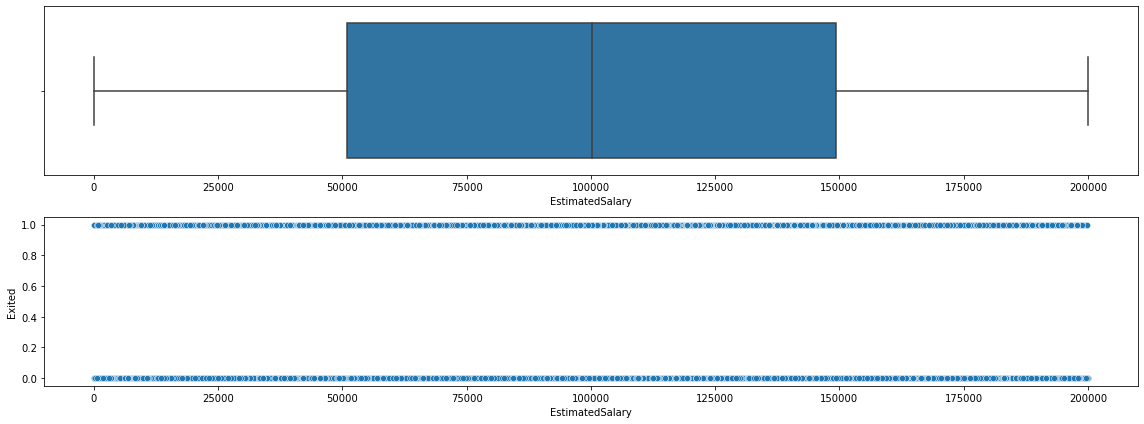

In [38]:
box_scatter(Churn,'EstimatedSalary','Exited');
plt.tight_layout()

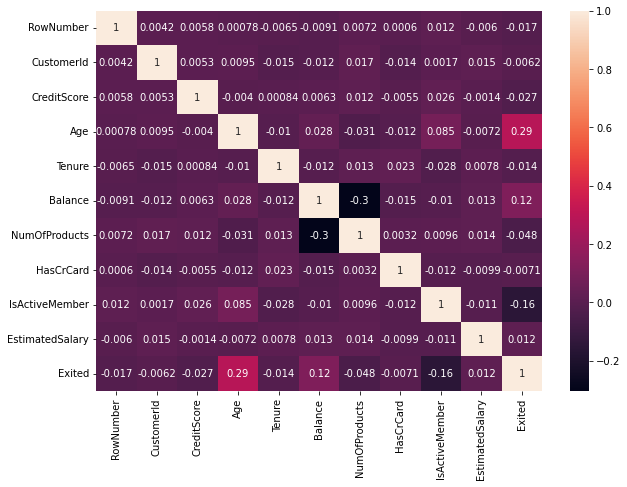

In [39]:
plt.figure(figsize = (10,7))
sns.heatmap(Churn.corr(), annot = True)
plt.show()

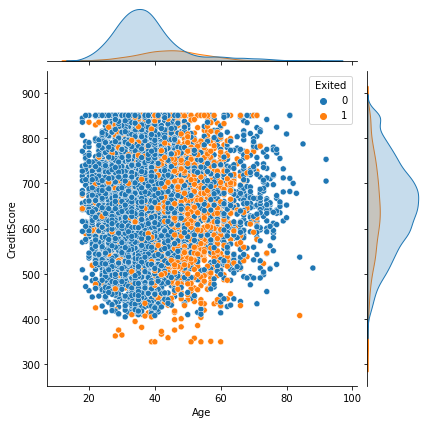

In [40]:
sns.jointplot(data = Churn, x ='Age', y = 'CreditScore', hue = 'Exited')
plt.show()

<center>${\textbf{Data Modeling}}$<center>

${\textbf{Method 1: Using Multiple Models}}$

In [41]:
col_transformer = ColumnTransformer([
    ('scaler', PowerTransformer(), ["CreditScore", "Age", "Balance", "EstimatedSalary"]),
    ('encoder', OneHotEncoder(drop='if_binary'), ["Geography", "Gender", "Tenure", 
                                                  "NumOfProducts", "HasCrCard", "IsActiveMember"])
],remainder='passthrough')

In [42]:
X = Churn[["CreditScore", "Age", "Balance", "EstimatedSalary",
                "Geography", "Gender", "Tenure", "NumOfProducts", 
                 "HasCrCard", "IsActiveMember"]]
y = Churn["Exited"]

In [43]:
def boxplots_models(results, names):
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

In [44]:
models = []
models.append(('NET', MLPClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('BGC', BaggingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('EXC', ExtraTreesClassifier()))

NET: 0.843959 (0.016396)
LR: 0.835625 (0.017234)
BGC: 0.816904 (0.018273)
RFC: 0.852120 (0.012437)
GBC: 0.867151 (0.010197)
SVM: 0.826718 (0.018563)
NB: 0.805427 (0.016255)
DTC: 0.688611 (0.020396)
KNC: 0.764063 (0.019618)
EXC: 0.831058 (0.014366)


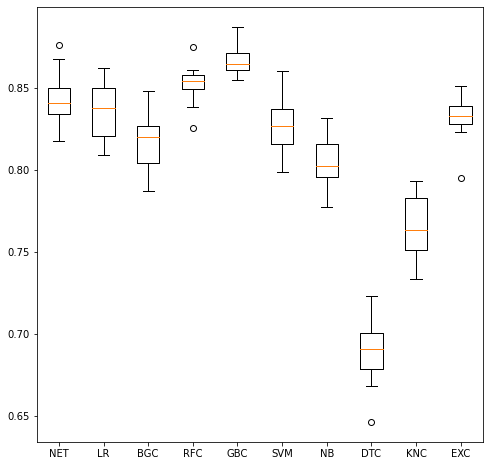

In [45]:
seed = 81
results = []
names = []
for name, model in models:
    pipeline = make_pipeline(col_transformer, model)  
    cv_technique = KFold(n_splits = 10, shuffle = True, random_state = seed)
    cv_results = cross_val_score(pipeline, X, y, cv = cv_technique, scoring = 'roc_auc') 
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    results.append(cv_results)
    names.append(name)
boxplots_models(results, names)

As previously demonstrated, the MLPClassifier(net) is the most performant; using the second method, we will attempt to further improve its performance.

${\textbf{Method 2: Using ANN classifier Models}}$

In [46]:
Churn =  pd.read_csv('Churn_Modelling.csv')

In [47]:
X = Churn.iloc[:, 3:13].values
y = Churn.iloc[:, 13].values

In [48]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X[:, 1:]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test.shape)
print(X_train.shape)

(2000, 11)
(8000, 11)


In [51]:
# Initialising the NN
model = Sequential()

# Adding the input layer and the first hidden layer (with dropout)
model.add(Dense(6,activation = 'relu',kernel_initializer = 'uniform',input_dim = 11)) # 6 nodes in hidden layer, initialize weights uniformly, use rectifier funtion for hidden layer, except 11 input nodes
model.add(Dropout(0.10))
# Adding the second hidden layer (with dropout)
model.add(Dense(4,activation = 'relu',kernel_initializer = 'uniform'))# input_dim already specified in previous hidden layer
model.add(Dropout(0.10))
# Adding the output layer
model.add(Dense(1,activation = 'sigmoid',kernel_initializer = 'uniform'))# only 1 node in output layer, use sigmoid function for probability

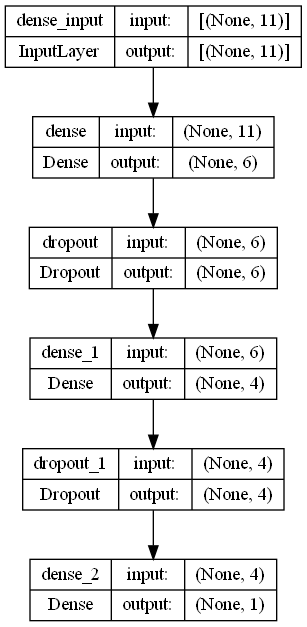

In [52]:
dot_img_file = '/tmp/model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

In [53]:
# Compiling the ANN - apply stochastic gradient descent
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) # loss defined this way since output is binary, only 1 output node

# Fitting the ANN to the Training set
history=model.fit(X_train, y_train, batch_size = 10, epochs = 30,validation_data=(X_test, y_test))  #epochs = 10

Epoch 1/30
800/800 [==============================] - 5s 3ms/step - loss: 0.5009 - accuracy: 0.7918 - val_loss: 0.4193 - val_accuracy: 0.8125
Epoch 2/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4366 - accuracy: 0.7922 - val_loss: 0.4161 - val_accuracy: 0.8125
Epoch 3/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4350 - accuracy: 0.7922 - val_loss: 0.4159 - val_accuracy: 0.8125
Epoch 4/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4337 - accuracy: 0.7922 - val_loss: 0.4119 - val_accuracy: 0.8125
Epoch 5/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4303 - accuracy: 0.7922 - val_loss: 0.4099 - val_accuracy: 0.8125
Epoch 6/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4320 - accuracy: 0.7968 - val_loss: 0.4094 - val_accuracy: 0.8350
Epoch 7/30
800/800 [==============================] - 2s 2ms/step - loss: 0.4294 - accuracy: 0.8148 - val_loss: 0.4097 - val_accuracy: 0.8365
Epoch 

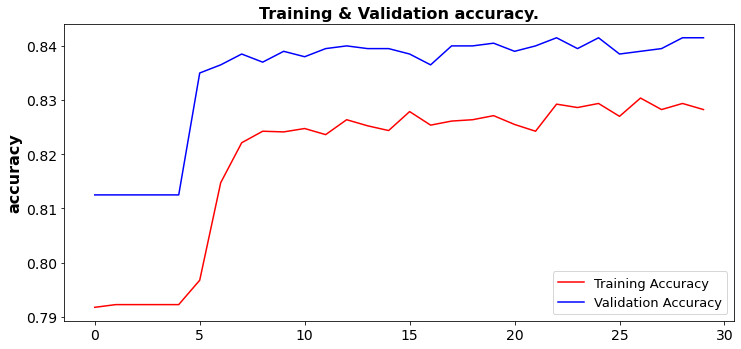

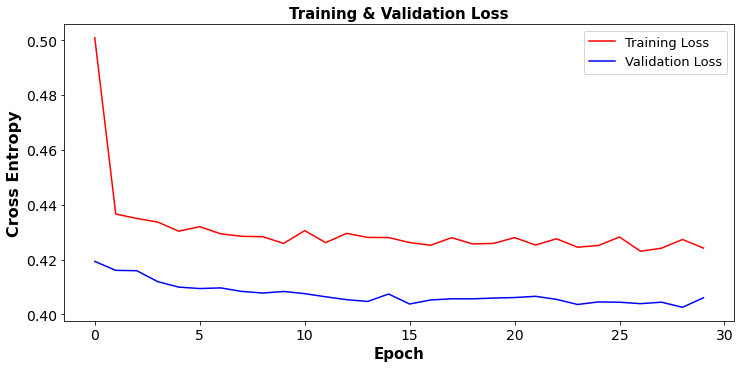

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('accuracy', fontsize=16, weight='bold')
plt.title('Training & Validation accuracy.', fontsize=16, weight='bold')

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Training & Validation Loss', fontsize=15, weight='bold')
# plt.yscale('log')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [55]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # Set threshold for returning true or false

# EXAMPLE: Predicting a single new observation
'''Predict if the customer with the following informations will leave the bank: 
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000
'''
new_prediction = model.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))) # Manually encode all independent variables, scale to training set
new_prediction = (new_prediction > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

1/1 [==============================] - 0s 13ms/step
[[1582   43]
 [ 274  101]]


In [56]:
labels=list(pd.get_dummies(Churn['Exited']).columns)

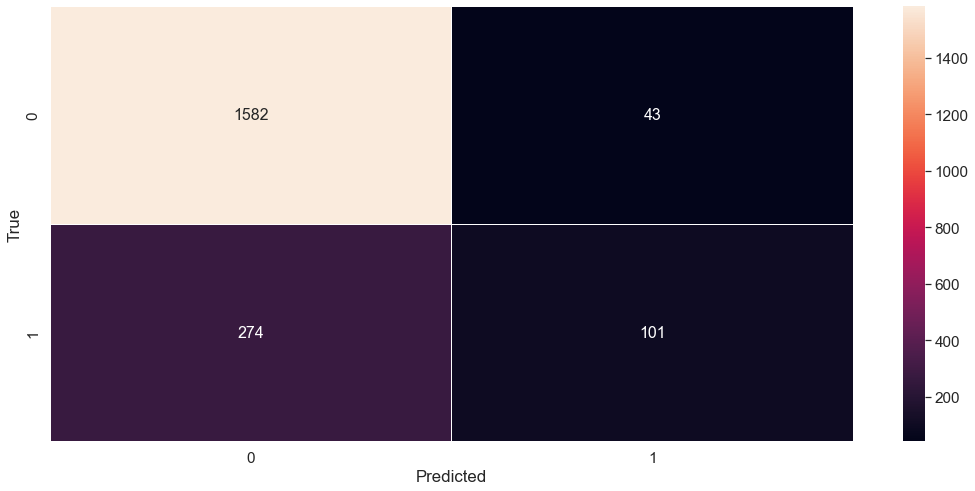

In [57]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5, xticklabels=labels, yticklabels=labels) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

${\textbf{Method 3: Improving ANN classifier}}$

In [58]:
Churn =  pd.read_csv('Churn_Modelling.csv')

In [59]:
X = Churn.iloc[:, 3:13].values
y = Churn.iloc[:, 13].values

In [60]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X[:, 1:]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_test.shape)
print(X_train.shape)

(2000, 11)
(8000, 11)


In [63]:
# Evaluating the ANN
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 3) 
accuracies = cross_val_score(estimator = classifier, X = X_train, y= y_train, cv = 10, n_jobs = -1) # input training data, n_jobs = -1 uses ALL CPUS for faster computation
mean = accuracies.mean()
variance = accuracies.std()
print(accuracies)

[0.82749999 0.84375    0.815      0.84249997 0.83749998 0.77749997
 0.78625    0.80500001 0.79750001 0.80374998]


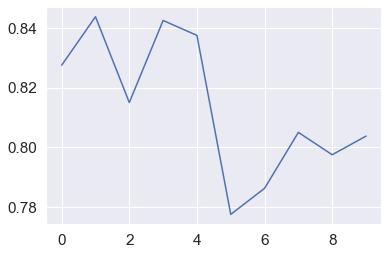

In [64]:
plt.plot(accuracies)
plt.show()

In [65]:

# Dropout regularization to reduce overfitting if needed (in part 2 above)
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32], 'epochs': [100, 500], 'optimizer': ['adam', 'rmsprop']} # create dictionary for parameters to optimize
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 2)
grid_search = grid_search.fit(X_train, y_train,validation_data=(X_test, y_test))
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6377 - accuracy: 0.7910 - val_loss: 0.5344 - val_accuracy: 0.7960
Epoch 2/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4672 - accuracy: 0.7940 - val_loss: 0.4462 - val_accuracy: 0.7960
Epoch 3/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.7940 - val_loss: 0.4409 - val_accuracy: 0.7960
Epoch 4/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.7940 - val_loss: 0.4385 - val_accuracy: 0.7960
Epoch 5/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4295 - accuracy: 0.7940 - val_loss: 0.4371 - val_accuracy: 0.7960
Epoch 6/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4274 - accuracy: 0.7940 - val_loss: 0.4351 - val_accuracy: 0.7960
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.4254 - accuracy: 0.7940 - val_loss: 0.4336 - val_accuracy: 0.7960

In [66]:
best_parameters

{'batch_size': 32, 'epochs': 500, 'optimizer': 'rmsprop'}

In [67]:
best_accuracy

0.85575

In [71]:
grid_search.best_estimator_.model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 6)                 72        
                                                                 
 dense_52 (Dense)            (None, 6)                 42        
                                                                 
 dense_53 (Dense)            (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Predicting the Test set results
y_pred = grid_search.best_estimator_.model.predict(X_test)
y_pred = (y_pred > 0.5) # Set threshold for returning true or false

# EXAMPLE: Predicting a single new observation
'''Predict if the customer with the following informations will leave the bank: 
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $60000
Number of Products: 2
Does this customer have a credit card ? Yes
Is this customer an Active Member: Yes
Estimated Salary: $50000
'''
new_prediction = grid_search.best_estimator_.model.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]))) # Manually encode all independent variables, scale to training set
new_prediction = (new_prediction > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

1/1 [==============================] - 0s 17ms/step
[[1538   54]
 [ 227  181]]


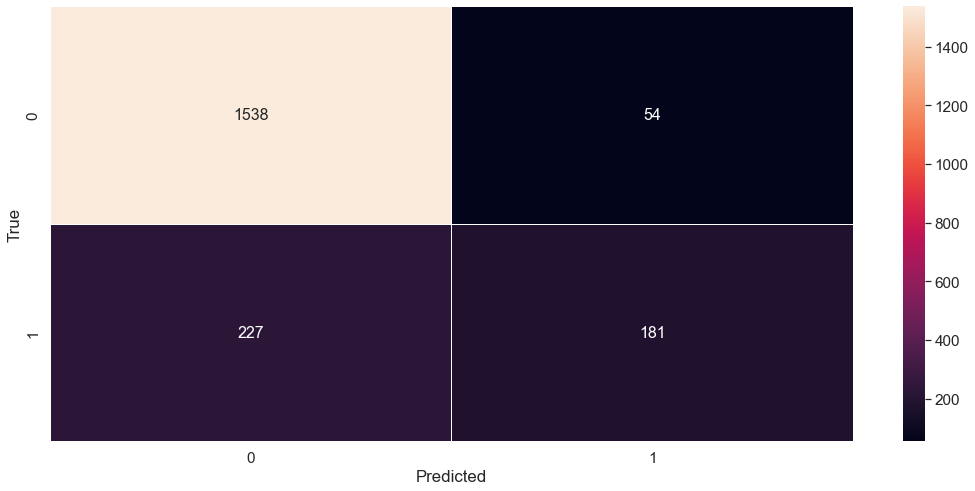

In [73]:
plt.figure(figsize=(18,8))
sns.set(font_scale=1.4) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='d',linewidths=0.5, xticklabels=labels, yticklabels=labels) 
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()